In [1]:
import eegMCI

In [2]:
## Time Stamp for the EEG data (3073 points form -2s to 4s)
T = eegMCI.TT()
T

array([-2.        , -1.99804688, -1.99609375, ...,  3.99609375,
        3.99804688,  4.        ])

In [3]:
## Converting channel name (string) to numerical index
all_chs = eegMCI.all_chs()
all_chs

{'Fp1': 0,
 'AF7': 1,
 'AF3': 2,
 'F1': 3,
 'F3': 4,
 'F5': 5,
 'F7': 6,
 'FT7': 7,
 'FC5': 8,
 'FC3': 9,
 'FC1': 10,
 'C1': 11,
 'C3': 12,
 'C5': 13,
 'T7': 14,
 'TP7': 15,
 'CP5': 16,
 'CP3': 17,
 'CP1': 18,
 'P1': 19,
 'P3': 20,
 'P5': 21,
 'P7': 22,
 'P9': 23,
 'PO7': 24,
 'PO3': 25,
 'O1': 26,
 'Iz': 27,
 'Oz': 28,
 'POz': 29,
 'Pz': 30,
 'CPz': 31,
 'Fpz': 32,
 'Fp2': 33,
 'AF8': 34,
 'AF4': 35,
 'AFz': 36,
 'Fz': 37,
 'F2': 38,
 'F4': 39,
 'F6': 40,
 'F8': 41,
 'FT8': 42,
 'FC6': 43,
 'FC4': 44,
 'FC2': 45,
 'FCz': 46,
 'Cz': 47,
 'C2': 48,
 'C4': 49,
 'C6': 50,
 'T8': 51,
 'TP8': 52,
 'CP6': 53,
 'CP4': 54,
 'CP2': 55,
 'P2': 56,
 'P4': 57,
 'P6': 58,
 'P8': 59,
 'P10': 60,
 'PO8': 61,
 'PO4': 62,
 'O2': 63,
 'EXG1': 64,
 'EXG2': 65,
 'EXG3': 66,
 'EXG4': 67,
 'EXG5': 68,
 'EXG6': 69,
 'EXG7': 70,
 'EXG8': 71}

In [4]:
## Table for subjectID, Gender, Age, sumMoCA, MCI
subjects_info = eegMCI.subjects_info()
subjects_info

,ID,GENDER,AGE,sumMoCA,MCI
0,1511,M,58,30,0
1,4504,M,65,30,0
2,4501,F,65,29,0
3,4503,F,72,29,0
4,4511,M,66,29,0
...,...,...,...,...,...
77,4567,M,61,20,1
78,4570,F,71,20,1
79,4579,F,63,20,1
80,4572,F,72,19,1


In [5]:
## query data from subjectID
## subject_query (subjectID,cue_tar,csd=True,min_trial=1,hit='both'):
epochs = eegMCI.subject_query(subjectID = '1511', cue_tar = 'target_lock', csd = True, min_trial = 1, hit='both')

In [6]:
## Condition
## Cue-Direction | Salient | Congruent
## L-R | Salient(SA)-Non-salient(NS) | Congruent(1)-Incongruent(2)

In [7]:
for key in epochs:
    print(f'{key} : {epochs[key].shape}')

LNS1 : (43, 64, 3073)
LNS2 : (37, 64, 3073)
RNS1 : (47, 64, 3073)
RNS2 : (43, 64, 3073)
LSA1 : (37, 64, 3073)
LSA2 : (46, 64, 3073)
RSA1 : (34, 64, 3073)
RSA2 : (36, 64, 3073)


In [8]:
def plot_ERP (epochs,cond,ch,time_window = (-2,4)):
    import matplotlib.pyplot as plt
    chi = all_chs[ch]
    ERP = epochs[cond][:,chi,:]
    ERP = ERP.mean(0)
    fig,ax = plt.subplots()
    ax.plot(T,ERP)
    ax.set_xlabel('Time(S)')
    ax.set_ylabel('Amplitude(V)')
    ax.set_xlim(time_window)
    fig.suptitle(f'{cond} : {ch} : {time_window}')
    fig.tight_layout()
    fig.show()
    

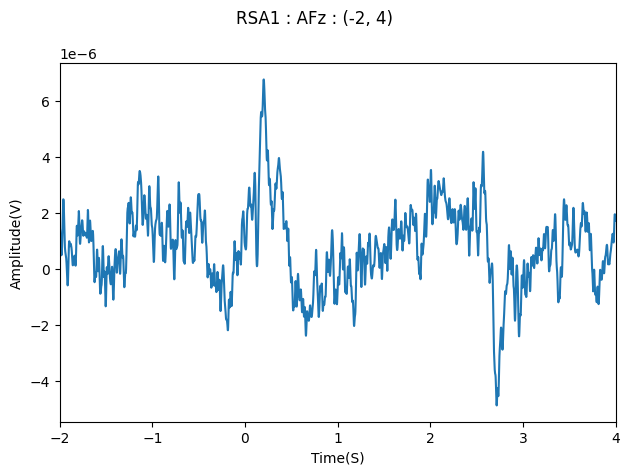

In [9]:
plot_ERP(epochs,'RSA1','AFz')

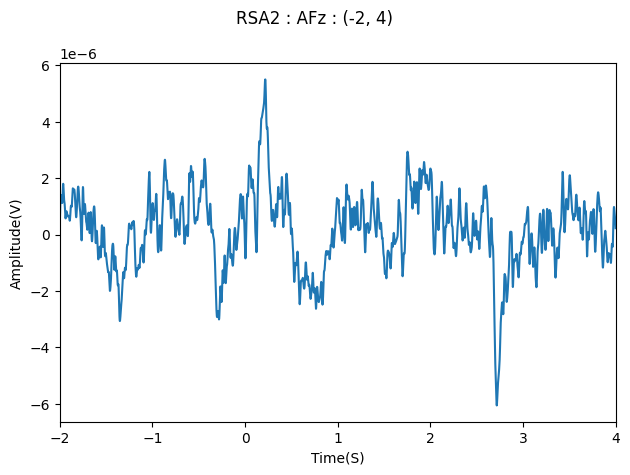

In [10]:
plot_ERP(epochs,'RSA2','AFz')